In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/Zomato Dataset.csv')
df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [ ]:
df.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


<Axes: >

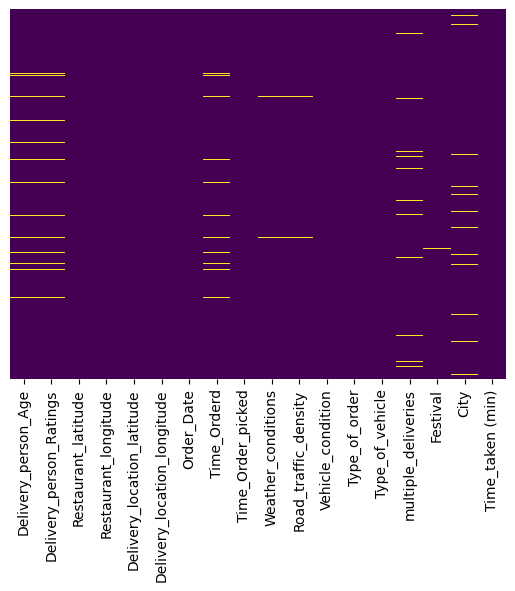

In [ ]:
sns.heatmap(df.isnull(), cbar=False,cmap='viridis',yticklabels=False)

<Axes: >

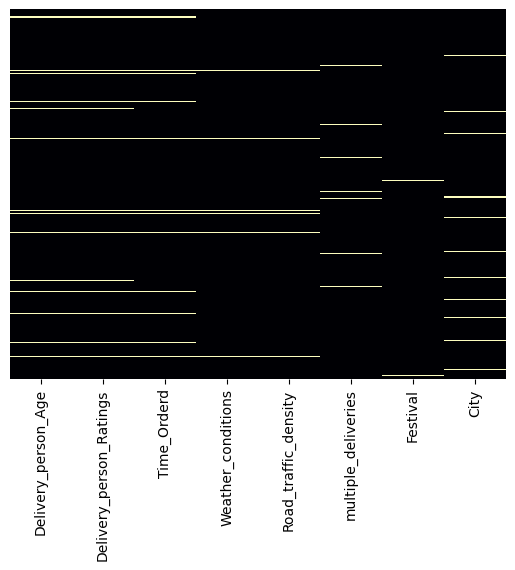

In [ ]:
d=df.isna().sum()/df.shape[0]*100   #data is less 5% we can drop NONE value of row
sns.heatmap(df[d[d>0].index].isna(), cbar=False,cmap='magma',yticklabels=False)

In [ ]:
df.dropna(inplace=True)
df.isna().sum().sum()
df.info()  #data is clean  now

<class 'pandas.core.frame.DataFrame'>
Index: 41359 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          41359 non-null  float64
 1   Delivery_person_Ratings      41359 non-null  float64
 2   Restaurant_latitude          41359 non-null  float64
 3   Restaurant_longitude         41359 non-null  float64
 4   Delivery_location_latitude   41359 non-null  float64
 5   Delivery_location_longitude  41359 non-null  float64
 6   Order_Date                   41359 non-null  object 
 7   Time_Orderd                  41359 non-null  object 
 8   Time_Order_picked            41359 non-null  object 
 9   Weather_conditions           41359 non-null  object 
 10  Road_traffic_density         41359 non-null  object 
 11  Vehicle_condition            41359 non-null  int64  
 12  Type_of_order                41359 non-null  object 
 13  Type_of_vehicle      

## 1. Delivery Person Ratings and Delivery Time:
How would you evaluate the effect of delivery person ratings on the overall delivery time? What data trends support or refute
 this?

In [ ]:
df.Delivery_person_Ratings.value_counts().shape

df[['Time_Orderd', 'Time_Order_picked']]
df.Time_Orderd.dtype
df['Time_taken']=df['Time_taken (min)']
del df['Time_taken (min)']

In [ ]:
from datetime import date
f = df[['Time_Orderd', 'Time_Order_picked']]

In [ ]:
utc_s = pd.to_datetime(f['Time_Orderd'], utc=True, errors='coerce')
utc_e = pd.to_datetime(f['Time_Order_picked'], utc=True, errors='coerce')
df['utc_s'] = utc_s
df['utc_e'] = utc_e
df.utc_s
df['Difference'] = (df['utc_e'] - df['utc_s'])

df['Difference'].dt.total_seconds() / 60
#datet.dropna(['Difference'])
df.head (2)

<ipython-input-11-e2fc31dd643c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  utc_s = pd.to_datetime(f['Time_Orderd'], utc=True, errors='coerce')
<ipython-input-11-e2fc31dd643c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  utc_e = pd.to_datetime(f['Time_Order_picked'], utc=True, errors='coerce')


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,utc_s,utc_e,Difference
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,2024-11-12 21:55:00+00:00,2024-11-12 22:10:00+00:00,0 days 00:15:00
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,2024-11-12 14:55:00+00:00,2024-11-12 15:05:00+00:00,0 days 00:10:00


In [ ]:
df['final_time']=(df.Difference.dt.total_seconds() / 60) + df['Time_taken']
df['final_time'].value_counts().shape
df['final_time'] = (df.Difference.dt.total_seconds() / 60) + df['Time_taken']
print(df['final_time'].value_counts().shape)

(55,)


In [ ]:
df.Difference=df.Difference.astype('str').str.split(':').str[1].astype('float')
df.Difference

,Difference
0,15.0
1,10.0
2,10.0
3,10.0
4,15.0
...,...
45579,10.0
45580,15.0
45581,NaN
45582,5.0


##  Festivals and Delivery Performance:
From this barplot we can conclude on Festival time the traffic effect the delivery long as normal, we can reduce

#label encoder


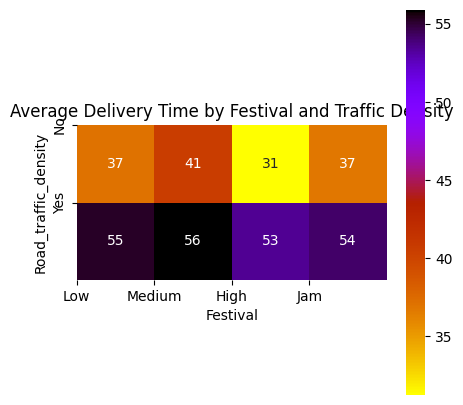

In [ ]:
d=df.groupby(['Festival', 'Road_traffic_density'])['final_time'].mean().sort_values(ascending=False).unstack()


plt.figure(figsize=(5,5))
sns.heatmap(d, annot=True, cmap='gnuplot_r',square=True,)
plt.title('Average Delivery Time by Festival and Traffic Density')

plt.xlabel('Festival')
plt.ylabel('Road_traffic_density')
plt.title('Average Delivery Time by Festival and Traffic Density')
plt.yticks(np.arange(2), ('No', 'Yes'))
plt.xticks(np.arange(4), ('Low', 'Medium', 'High', 'Jam'))
plt.show()

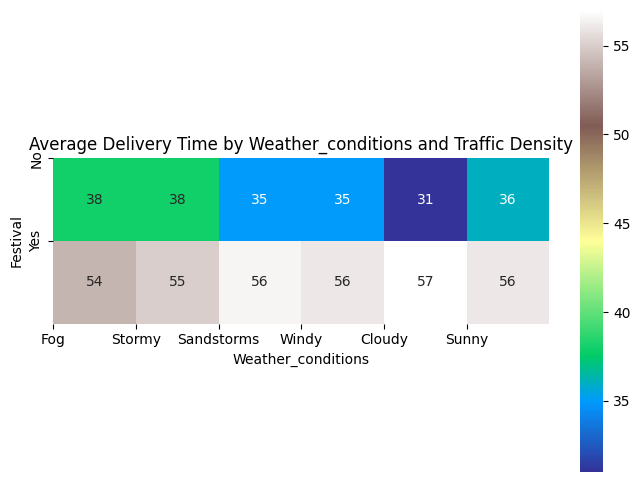

In [ ]:

d=df.groupby(['Festival', 'Weather_conditions'])['final_time'].median().sort_values(ascending=False).unstack()

plt.figure(figsize=(8,6))
sns.heatmap(d, annot=True, cmap='terrain',square=True,)
plt.title('Average Delivery Time by Weather_conditions and Traffic Density')

plt.ylabel('Festival')
plt.xlabel('Weather_conditions')
plt.yticks(np.arange(2), ('No', 'Yes'))
plt.xticks(np.arange(6), ('Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny'))
#plt.yticks(np.arange(2), ('No', 'Yes'))plt.xticks(np,arange(6),(Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny'))
plt.show()

<Figure size 200x500 with 0 Axes>

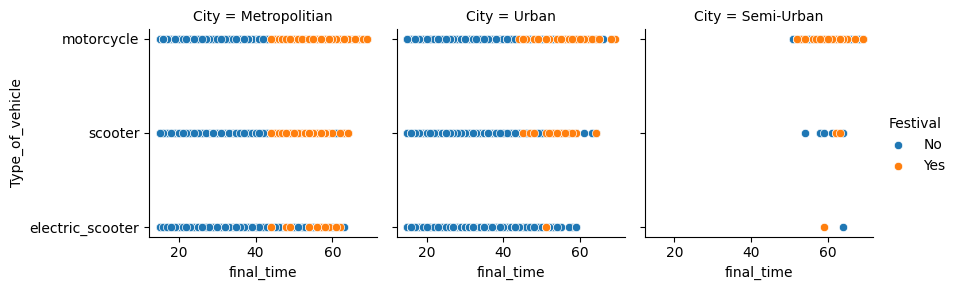

"'Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',\n       'Restaurant_latitude', 'Restaurant_longitude',\n       'Delivery_location_latitude', 'Delivery_location_longitude',\n       'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',\n       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',\n       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City', 'utc_s',\n       'utc_e', 'Difference', 'Time_taken', 'final_time']"

In [ ]:

plt.figure(figsize=(2,5))

g = sns.FacetGrid(df, col="City", hue="Festival")
g.map_dataframe(sns.scatterplot, x="final_time", y="Type_of_vehicle")
g.add_legend()


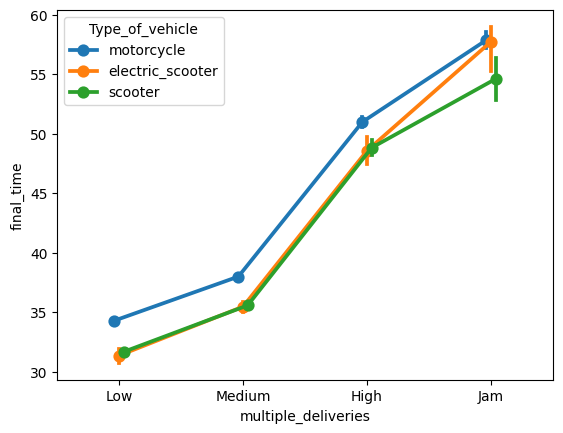

In [ ]:
#sns.pointplot(data=df, x="City", y="final_time", hue="Type_of_vehicle", dodge=True)
sns.pointplot(data=df, x="multiple_deliveries", y="final_time", hue="Type_of_vehicle", dodge=True)
plt.xticks(np.arange(4), ('Low', 'Medium', 'High', 'Jam'))
plt.show()

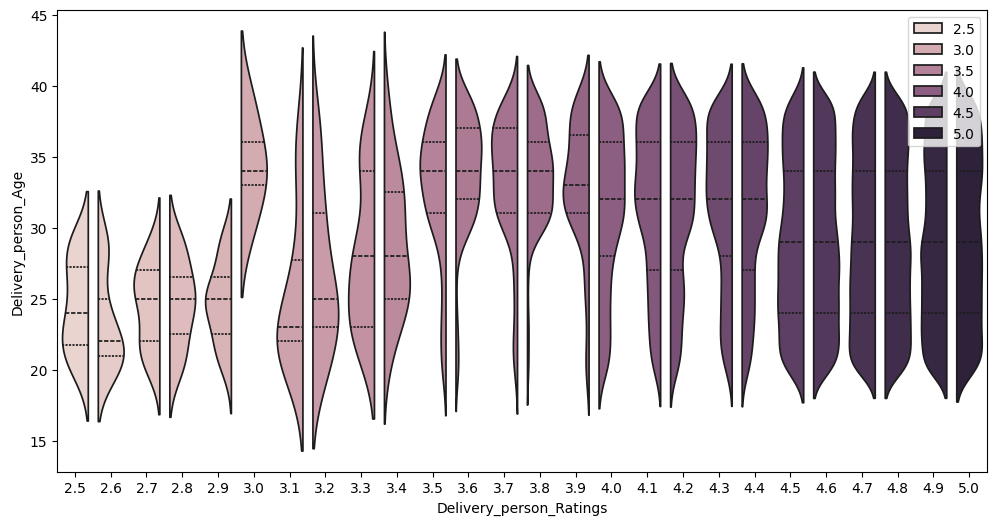

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='Delivery_person_Ratings',  y="Delivery_person_Age", hue="Delivery_person_Ratings", split=True, gap=.1, inner="quart",)
plt.legend(loc='upper right')
plt.show()

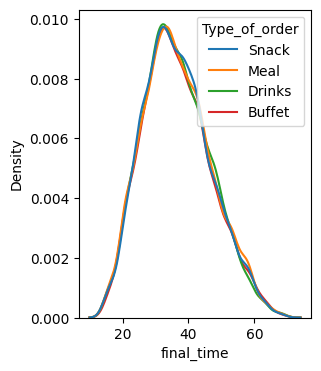

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken', 'utc_s',
       'utc_e', 'Difference', 'final_time'],
      dtype='object')

In [ ]:
d=df[['Type_of_order','final_time']]
plt.figure(figsize=(3,4))

sns.kdeplot(data=d, x="final_time", hue="Type_of_order")

plt.show()
df.columns

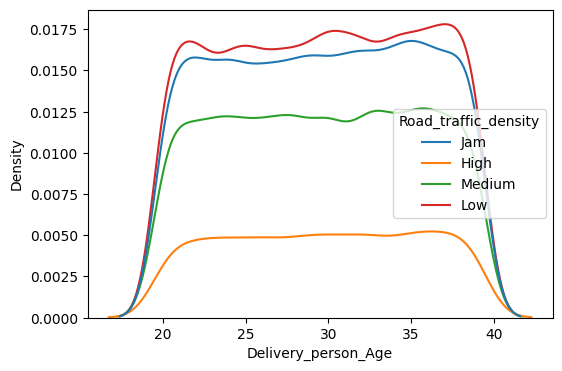

In [ ]:
d=df[['Road_traffic_density','Delivery_person_Age']]
plt.figure(figsize=(6,4))

sns.kdeplot(data=d, x="Delivery_person_Age", hue="Road_traffic_density")

plt.show()

##prediction for time

In [ ]:
df['Order_Date_date']=df.Order_Date.str.split('-').str[0].astype('int')
df['Order_Date_month']=df.Order_Date.str.split('-').str[1].astype('int')

df['Order_Date_year']=df.Order_Date.str.split('-').str[2].astype('int')
del df['Order_Date']

In [ ]:
df['Order_Date_date']=df.Order_Date_date
df.Order_Date_date

,Order_Date_date
0,12
1,13
2,4
3,13
4,14
...,...
45579,24
45580,16
45581,11
45582,7


In [ ]:
df['Time_Orderd_hours']=df.Time_Orderd.str.split(':').str[0]
df['Time_Orderd_sec']=df.Time_Orderd.str.split(':').str[1]
df['Time_Order_picked_sec']=df.Time_Order_picked.str.split(':').str[1]
df['Time_Order_picked_hr']=df.Time_Order_picked.str.split(':').str[1]

In [ ]:
del df['final_time']
del df['Difference']
del df['utc_s']
del df['utc_e']

del df['Time_Orderd']
del df['Time_Order_picked']
del df['Order_Date_year']

In [ ]:
x=df.Time_taken
df.drop(['Time_taken'],axis=1,inplace=True)

df=df.merge(x,left_index=True,right_index=True)
df.dropna()
df=df.sample(n=17000, random_state=42)

In [ ]:


from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
zoom=train_set.Time_taken.copy()
zom =train_set.drop(['Time_taken'],axis=1)
zom_labels=train_set['Time_taken'].copy()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy="median")

In [ ]:

from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [ ]:

from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(zom_labels.to_frame())

model = LinearRegression()
model.fit(train_set[["Time_taken"]], scaled_labels)
some_new_data = train_set[["Time_taken"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [ ]:
#housing_labels=df.Time_taken.copy()
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(zom[['Restaurant_latitude'   ,'Restaurant_longitude','Delivery_location_latitude',   'Delivery_location_longitude']],sample_weight=zom_labels)
similarities[:3].round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
from sklearn.pipeline import make_pipeline
zom_num = zom.select_dtypes(include=[np.number])

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
zom_num_prepared = num_pipeline.fit_transform(zom_num) ##i take the df instead of zoom
print(zom_num_prepared[:1].round(2))      #.shape)

[[-0.81 -0.42  0.68  0.83  0.7   0.83 -1.23  0.44  0.02 -1.77]]


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
# Manually specify numeric and categorical columns
num_attribs = zom.select_dtypes(include=np.number).columns
cat_attribs = zom.select_dtypes(include=object).columns
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(zom, zom_labels)
from sklearn.metrics import mean_squared_error
zom_predictions = lin_reg.predict(zom)
zom_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred
lin_rmse = mean_squared_error(zom_labels, zom_predictions,
                              squared=False)
print(lin_rmse,lin_reg.score(zom,zom_labels))


from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import ElasticNet
lasso_reg = make_pipeline(preprocessing, ElasticNet(alpha=.01,l1_ratio=0.5))
lasso_reg.fit(zom, zom_labels)
#tree_reg = make_pipeline(preprocessing, SGDRegressor(random_state=42))

#tree_reg.fit(zom, zom_labels)
housing_predictions = lasso_reg.predict(zom)
tree_rmse = mean_squared_error(zom_labels, housing_predictions,
                              squared=False)
tree_rmse,lasso_reg.score(zom,zom_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5.873832392814446 0.6065058818444452


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(6.078094622156379, 0.5786625537433513)

In [ ]:
tree_reg = make_pipeline(preprocessing, SGDRegressor(random_state=0))
tree_reg.fit(zom, zom_labels)
housing_predictions = tree_reg.predict(zom)
tree_rmse = mean_squared_error(zom_labels, housing_predictions, squared=False)
print(tree_rmse, tree_reg.score(zom, zom_labels))

6.060362899791241 0.5811173167547117


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(tree_reg, zom, zom_labels, scoring='accuracy', cv=10)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 231, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 112, in _check_targets
    raise ValueError(
ValueError: Clas

Cross-validation scores: [nan nan nan nan nan nan nan nan nan nan]
Mean cross-validation score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 231, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 112, in _check_targets
    raise ValueError(
ValueError: Clas

In [ ]:
from sklearn.ensemble import RandomForestRegressor


forest_reg = make_pipeline(
    preprocessing,
    RandomForestRegressor(random_state=42))#n_estimators=100, max_depth=15,  n_jobs=-1, max_samples=0.8))

forest_reg.fit(zom, zom_labels)
housing_predictions = forest_reg.predict(zom)
#forest_rmse = mean_squared_error(zom_labels, housing_predictions,scoring="neg_root_mean_squared_error", cv=10,
 #                                squared=False)
forest_rmses = -cross_val_score(forest_reg, zom, zom_labels,
                                scoring="neg_root_mean_squared_error")

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate test data with a linear relationship
def generate_dataset(n_samples=100, slope=2, intercept=5, noise_std=0.1):
    X = np.random.rand(n_samples, 1)  # Generate random features
    y = slope * X + intercept + noise_std * np.random.randn(n_samples, 1)
    return X, y

# Calculate R-squared from scratch
def r_squared(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_tot = np.sum((y_true - mean_y)**2)
    ss_res = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_res / ss_tot)
    return r2
r2 = r2_score(zom_labels, forest_reg.predict(zom))
print(r2)

r2 = r_squared(zom_labels, forest_reg.predict(zom))
print("R-squared from scratch:", r2*100)

0.963415091749676
R-squared from scratch: 96.3415091749676


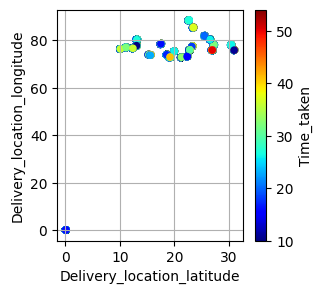

In [ ]:
df.plot(kind="scatter", x="Delivery_location_latitude", y="Delivery_location_longitude", grid=True,
 #s=df["Time_taken"] / 100, label="Time_taken",
 c="Time_taken", cmap="jet", colorbar=True,
 legend=True, sharex=False, figsize=(3,3))
plt.show()

In [ ]:
#Weather_conditions Road_traffic_density    Vehicle_condition   Type_of_order   Type_of_vehicle multiple_deliveries Festival    City
df.Road_traffic_density
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Road_traffic_density=le.fit_transform(df.Road_traffic_density)
df.Festival=le.fit_transform(df.Festival)
df.Type_of_order=le.fit_transform(df.Type_of_order)
df.Type_of_vehicle=le.fit_transform(df.Type_of_vehicle)
df.multiple_deliveries=le.fit_transform(df.multiple_deliveries)
df.City=le.fit_transform(df.City)
df.Weather_conditions=le.fit_transform(df.Weather_conditions)
df.Road_traffic_density.unique()

df.Weather_conditions.unique()
df.Type_of_order=le.fit_transform(df.Type_of_order)
df.Type_of_order.unique() #['Meal', 'Snack', 'Drinks', 'Buffet']

array([0, 2, 1, 3])

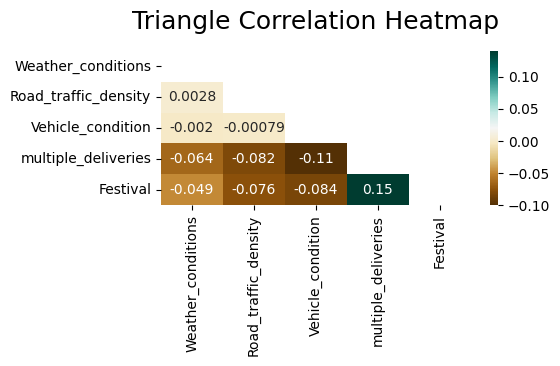

In [ ]:
plt.figure(figsize=(5,2))
d=df[[

         'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition',
        'multiple_deliveries', 'Festival']]
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(d.corr()))#, dtype=np.bool))
heatmap = sns.heatmap(d.corr(), mask=mask, vmin=-.1, vmax=.14, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);


